## HotChili Analytics trading notebook template
#### Configure by setting ALGO_NAME in cell below.
#### Run various options (backtest, ingest, live) by uncommenting one cell 

In [1]:
%matplotlib inline
%load_ext zipline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd
import pyfolio as pf
import hca_mrevonez as mr

/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/hca-r2-001/miniconda3/envs/hca/lib/python3.6/site-packages/odo/backends/pandas.py:94: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
import pandas as pd

# Options you can uncomment and set:

# pd.set_option("max_colwidth", 300)
# pd.set_option("display.max_rows", 300)
# pd.set_option("display.max_columns", 50)
# pd.set_option('precision', 2)
# pd.options.display.float_format = '{:20,.2f}'.format

In [3]:
import os

hca_root_path = os.environ['HCA_ROOT']
print(f"hca_root_path = {hca_root_path}")

hca_root_path = /home/hca-ws2004/hca


# Construct algorithm strategy path names

Assumptions:

- the strategy is in a directory with the same name as the strategy in `ALGO_NAME` below
- the strategy is located in the hca-resources directory, which is located relative to `hca_root_path`, found above

In [4]:
ALGO_NAME = "HCA_Mean_Reversion" # <--- Supply name here

Other variables are derived from `ALGO_NAME`:

In [5]:
HCA_RESOURCES_PATH = hca_root_path + "/hca-resources/" 
ALGO_PATH          = HCA_RESOURCES_PATH + ALGO_NAME + "/" 
ALGO_BT            = ALGO_PATH + ALGO_NAME + ".py"
ALGO_BT_OUT        = ALGO_PATH + ALGO_NAME + ".pkl"
ALGO_LIVE          = ALGO_PATH + ALGO_NAME + "_Live" + ".py"

print(f"""
ALGO_NAME          = {ALGO_NAME}
HCA_RESOURCES_PATH = {HCA_RESOURCES_PATH}
ALGO_PATH          = {ALGO_PATH}
ALGO_BT            = {ALGO_BT}
ALGO_BT_OUT        = {ALGO_BT_OUT}
ALGO_LIVE          = {ALGO_LIVE}

Contents of algo directory:
""")

!ls $ALGO_PATH


ALGO_NAME          = HCA_Mean_Reversion
HCA_RESOURCES_PATH = /home/hca-ws2004/hca/hca-resources/
ALGO_PATH          = /home/hca-ws2004/hca/hca-resources/HCA_Mean_Reversion/
ALGO_BT            = /home/hca-ws2004/hca/hca-resources/HCA_Mean_Reversion/HCA_Mean_Reversion.py
ALGO_BT_OUT        = /home/hca-ws2004/hca/hca-resources/HCA_Mean_Reversion/HCA_Mean_Reversion.pkl
ALGO_LIVE          = /home/hca-ws2004/hca/hca-resources/HCA_Mean_Reversion/HCA_Mean_Reversion_Live.py

Contents of algo directory:

ARKK.csv		      mean_reversion.ipynb	 SPY.csv
HCA_Mean_Reversion_Bot	      mean_reversion_profit.csv  summary.png
HCA_Mean_Reversion.ipynb      mytable.png		 TLT.csv
HCA_Mean_Reversion_old.ipynb  __pycache__		 TSLA.csv
hca_mrevonez.py		      SCHD.csv
IWM.csv			      spy.csv


## Backtest: 

- Method: Jupyter magic cell (%%) 
- Execution of zipline code in cell containing command line command
- Uncomment first line and hit (shift-enter) inside the cell to run simulation backtest

In [6]:
equity='SCHD'#'IWM' #'TSLA' #'SPY' #'ARKK' #'ARKK' #'TSLA'
strat_name = 'MeanRevOneZ'
sim_days = 730
tail_days = 10

end_dt  = pd.datetime.today()
strt_dt = end_dt - pd.DateOffset(days=sim_days)                    
strt_ts =  strt_dt.strftime("%Y-%m-%d")
end_ts  = end_dt.strftime("%Y-%m-%d")
print("start={} end={} simdays={} tail_days={}".format(strt_ts, end_ts, sim_days, tail_days))



msg     = ['Using equity ',
           equity,
           'with strategy:',
           strat_name,
           'during period:',
           '['+ strt_ts + ', ' + end_ts +']'
           ]

strat = mr.MeanRevOneSymZ(strt_ts, end_ts)
strat.asset_sym = equity
stock      = strat.get_asset_data(strat.av_key, strat.asset_sym, strt_ts, end_ts)

bt_df      = strat.mr_trade(stock, strat.window_len)
perf       = bt_df['equity'].calc_stats()

perf_ret = pd.Series(bt_df['equity'])
perf_ret = perf_ret.replace([np.inf, -np.inf], np.nan)
perf_ret = perf_ret.fillna(0).diff().fillna(0)
#.fillna(0).pct_change()

perf.display()

#perf_equity_md = perf.stats.as_format('.3f').to_markdown()
stats_disp =None
if tail_days >0:
    stats_disp = bt_df[['Close','money','amount','equity']].tail(tail_days)

msg2= f"\n\nLast {tail_days} of strategy\n\n"
print(msg2)
print(stats_disp)


start=2019-04-15 end=2021-04-14 simdays=730 tail_days=10
Stats for equity from 2019-04-15 00:00:00 - 2021-04-13 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-                   0.66  8.28%   -13.29%

Annualized Returns:
mtd    3m     6m     ytd    1y      3y     5y    10y    incep.
-----  -----  -----  -----  ------  -----  ----  -----  --------
0.00%  0.28%  1.50%  1.09%  18.19%  8.28%  -     -      8.28%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.66     0.87       0.85
mean    8.89%    8.41%      6.50%
vol     13.55%   9.67%      7.65%
skew    1.00     -1.39      -
kurt    16.41    5.55       -
best    7.10%    6.17%      11.91%
worst   -4.28%   -8.85%     1.09%

Drawdowns:
max      avg       # days
-------  ------  --------
-13.29%  -3.53%     30.44

Misc:
---------------  -------
avg. up month    2.14%
avg. down month  -1.31%

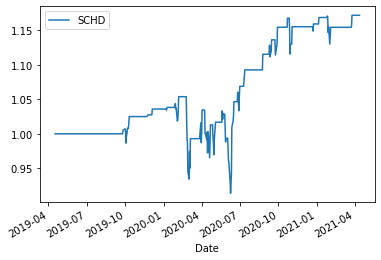

In [18]:
bt_df = bt_df.rename(columns={'equity': equity})
(bt_df[[equity]].pct_change()+1.).cumprod().plot()

Index(['Open', 'Close', 'mu', 'std', 'zscores', 'money', 'amount',
       'fixed_frac', 'sma', 'lma', 'SCHD'],
      dtype='object')

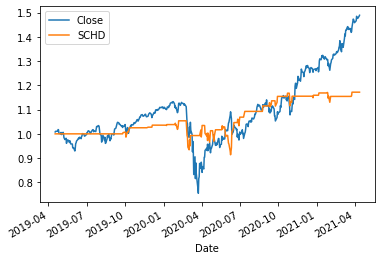

In [19]:
(bt_df[['Close',str(equity)]].pct_change()+1.).cumprod().plot()

## Ingest Sharadar funds assets for today

In [ ]:
TODAY = pd.datetime.today().strftime("%Y-%m-%d")
print("TODAY = {}".format(TODAY))

In [ ]:
#bt_df